Dự đoán tỷ lệ đột quỵ sử dụng Random Forest với pipelines

In [100]:
# import thư viện
import pandas as pd # load data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

In [101]:
# loading the data
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [102]:
# kiểm tra missing data và dropping item
stroke.isna().sum()
# dropna
stroke = stroke.dropna()
# bỏ cột id
stroke = stroke.drop('id', axis=1)
stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [103]:
stroke.dtypes
# theo nguồn dữ liệu, hầu hết các biến đều mang tính phân loại

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [104]:
### Mã hóa nhãn dữ liệu:
le = LabelEncoder()
# các cột cần mã hóa
cols = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
# quá trình mã hóa nhãn
stroke[cols] = stroke[cols].apply(lambda col: le.fit_transform(col))
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [105]:
# Để chia tỷ lệ dữ liệu trước khi đưa vào mô hình RF, chúng ta sử dụng 1 pipeline
# Defining pipeline
# scaler và rf classifier
# pipeline sẽ chia tỷ lệ dữ liệu trước khi đưa vào classifier
pipe = Pipeline([('scaler', StandardScaler()),('rf', RandomForestClassifier())])
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [106]:
# Phân chia dữ liệu:

# Xác định X và y
X = stroke.loc[:, 'gender':'smoking_status']
y = stroke.stroke
# chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [107]:
# Mô hình Random forest sử dụng pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [108]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
acc = pipe.score(X_test, y_test)
print('Accuracy:', acc)

Accuracy: 0.9517990495587237


In [110]:
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 1.0


In [111]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[1401    0]
 [  71    1]]


In [112]:
cr= classification_report(y_test, y_pred)
print('Classification report:\n', cr)

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1401
           1       1.00      0.01      0.03        72

    accuracy                           0.95      1473
   macro avg       0.98      0.51      0.50      1473
weighted avg       0.95      0.95      0.93      1473



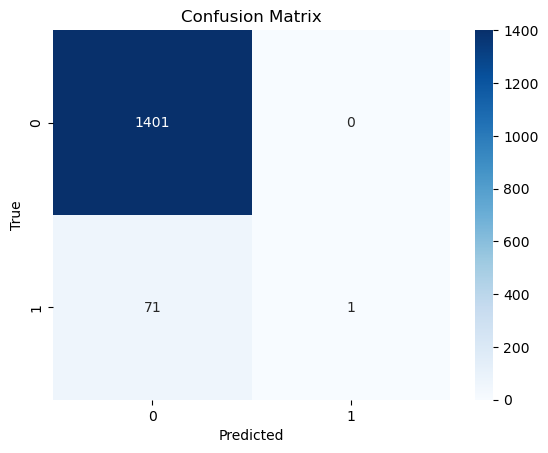

In [113]:
# Biểu đồ Confusion Matrix:
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

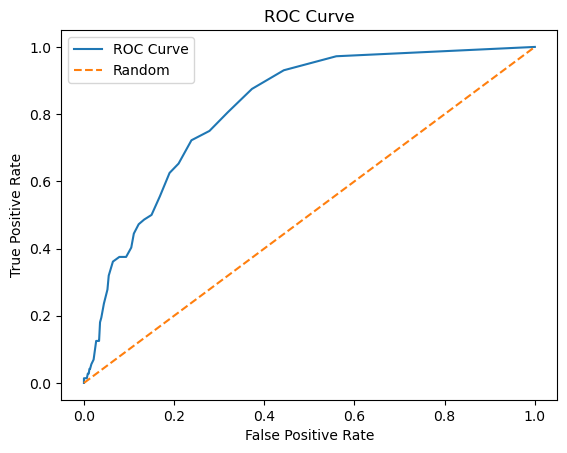

AUC: 0.8164307240859703


In [114]:
# Biểu đồ ROC Curve và AUC:
y_probs = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
auc = roc_auc_score(y_test, y_probs)
print('AUC:', auc)

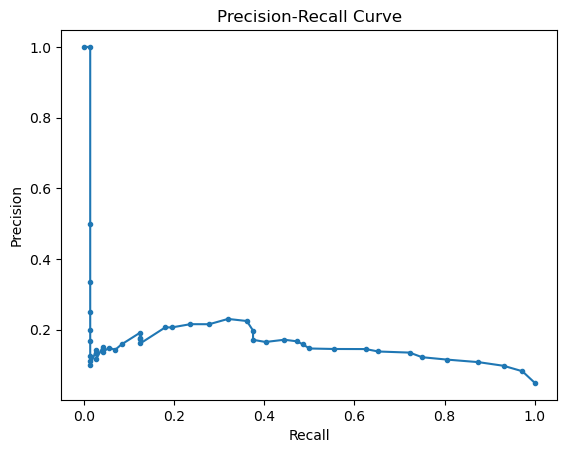

In [115]:
# Biểu đô Precision-Recall Curve:
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_probs)

plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()